# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Gemstone Dataset - Utkarsh Gaikwad</p>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [13]:
df= pd.read_csv(r'/Users/user/ML_course/4th_month/wrapped/notebook/data/personality_dataset.csv')

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Introduction to the dataset</p>



**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `Time_spent_Alone` : Time spent alone per day
* `Stage_fear` : How much fear do you have to go to the next stage? Scale it from 1 to 10
* `Social_event_attendance` : How often do you go to social events? Scale it from 1 to 10
* `Going_outside` : How often do you go outside? Scale it from 1 to 10
* `Drained_after_socializing` : Do you feel drained after socializing? Yes or No
* `Friends_circle_size` : How many friends a person has
* `Post_frequency` : How often do you post on social media? Scale it from 1 to 10

Target variable:
* `Personality`: Whether the person is a `Extrovert` or `Introvert`

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

    Dataset info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Preprocessing: handling missing, duplicated values, drop the unnecessary columns</p>

In [15]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [26]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has {df[col].isnull().sum()} missing values.")
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
            
print(f"After handling missing values:")
df.isnull().sum()

After handling missing values:


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

    Duplicated handling

In [27]:
df.drop_duplicates(inplace=True)

    Dropping unnecessary columns

In [28]:
df.drop(['Post_frequency'], axis=1, inplace=True)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

    Numerical and Categorical columns separation

In [29]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size']
Categorical Columns : ['Stage_fear', 'Drained_after_socializing', 'Personality']


    Numerical columns description

In [30]:
df[numerical_columns].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,4.232128,4.200867,3.192954,6.580130
std,3.406630,2.874305,2.218807,4.257516
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000
50%,3.000000,4.000000,3.000000,6.000000
75%,7.000000,7.000000,5.000000,10.000000
max,11.000000,10.000000,7.000000,15.000000


    Caterogical columns description

In [34]:
df[categorical_columns].describe()

,Stage_fear,Drained_after_socializing,Personality
count,2498,2498,2498
unique,2,2,2
top,No,No,Extrovert
freq,1407,1409,1403


    Unique values of each column

In [35]:
df.nunique()

Time_spent_Alone             13
Stage_fear                    2
Social_event_attendance      12
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          17
Personality                   2
dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

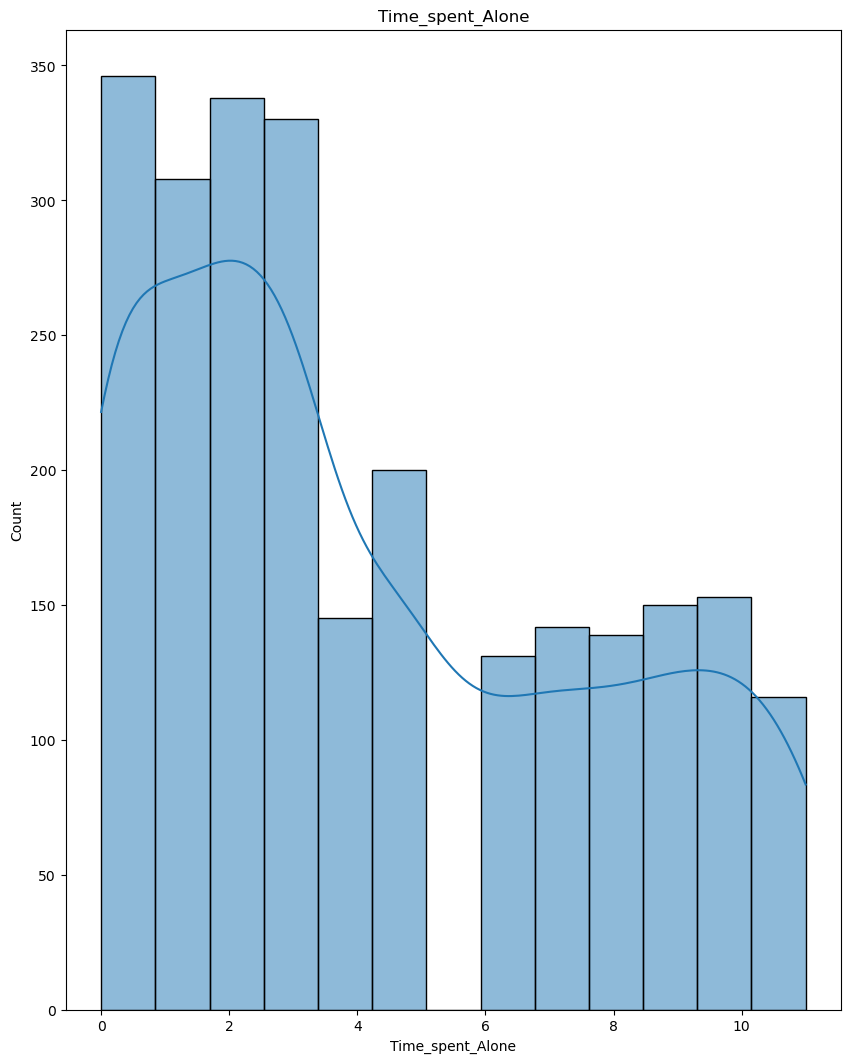

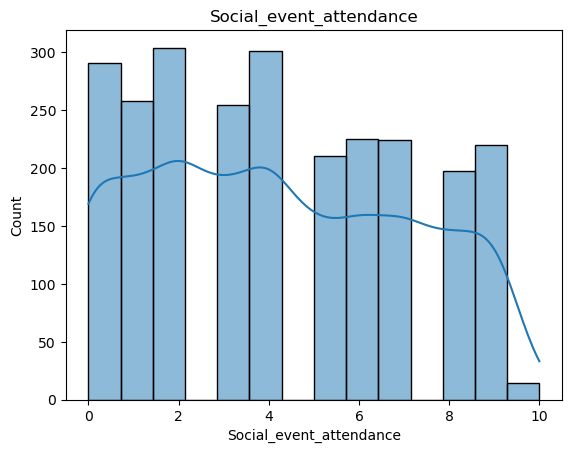

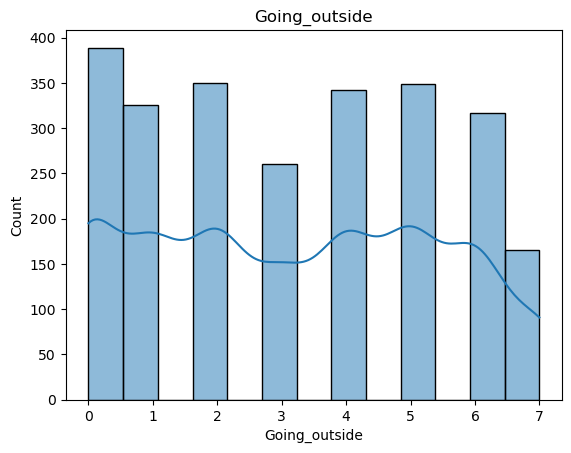

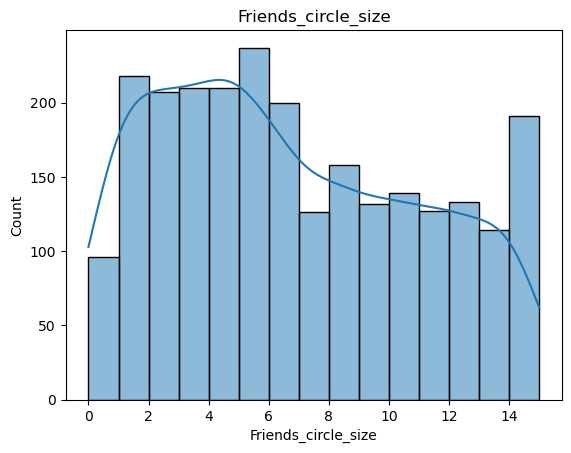

In [37]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

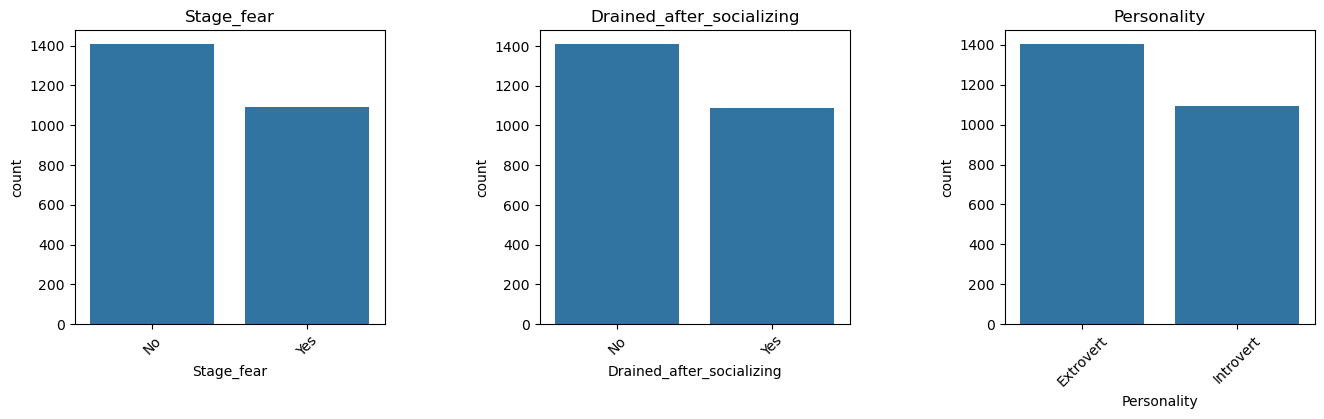

In [43]:
# value counts for categorical columns
plt.figure(figsize=(16,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in categorical_columns:
    plt.subplot(3, 3, x)
    sns.countplot(data = df, x = i)
    plt.title(i)
    plt.xticks(rotation=45)
    x += 1
   
    

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

    Correlation heatmap

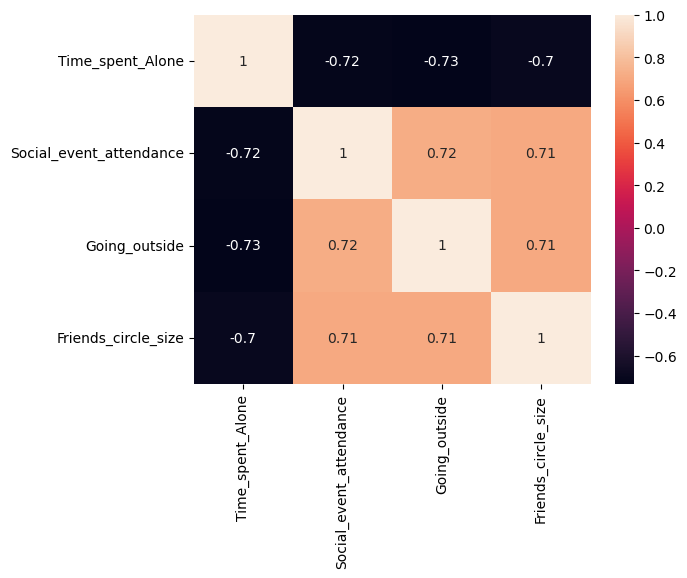

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

    Pairplot

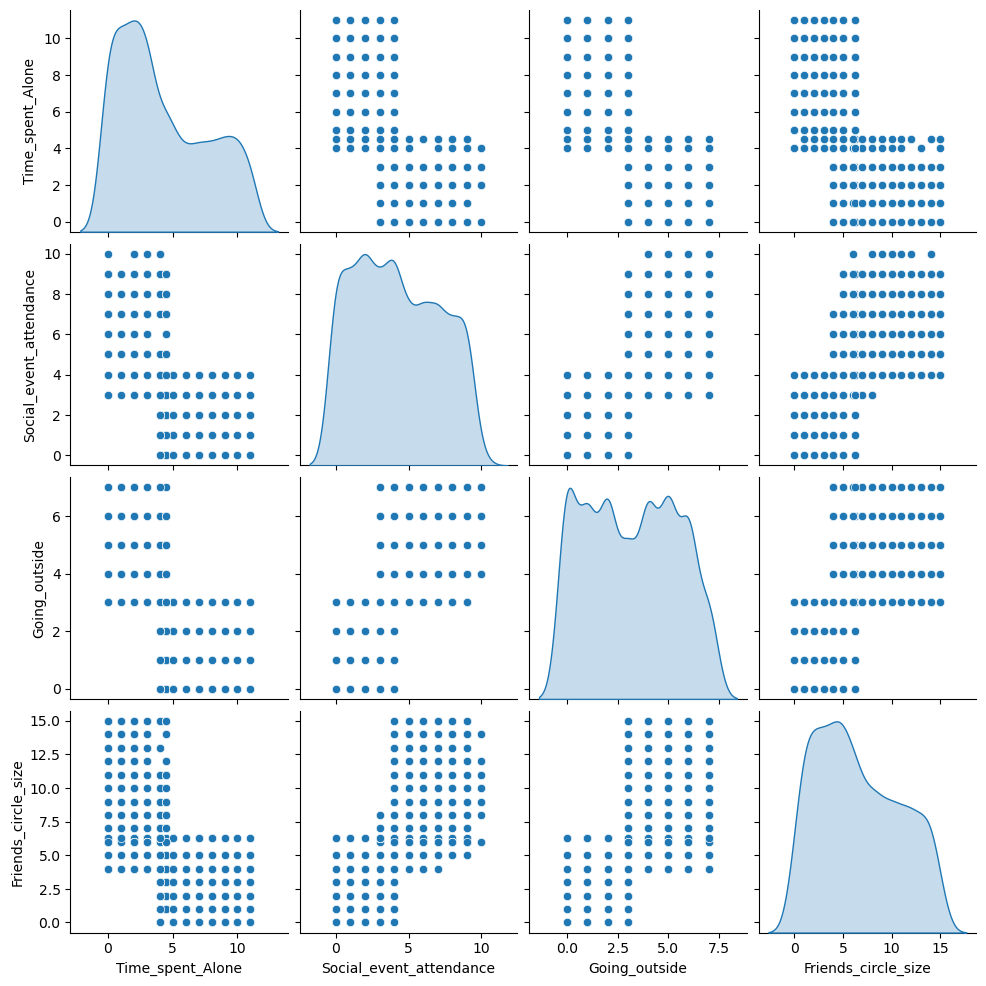

In [46]:
sns.pairplot(df,diag_kind='kde')
plt.show()

## Numerical vs Target Feature Price Boxplot

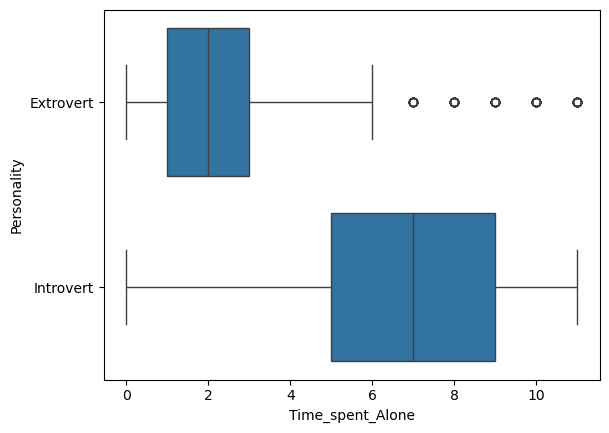

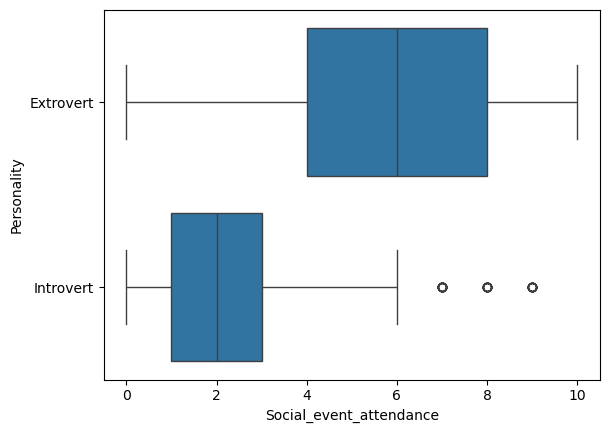

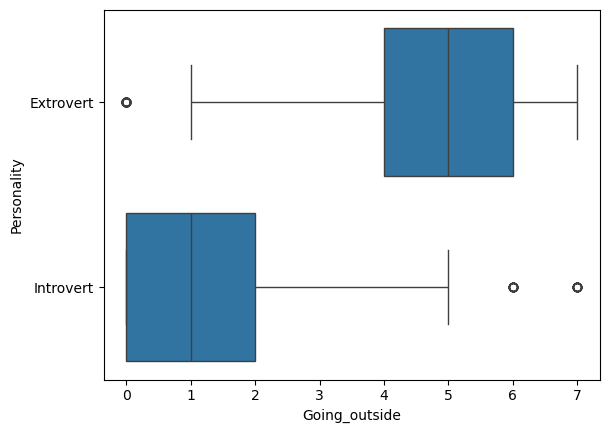

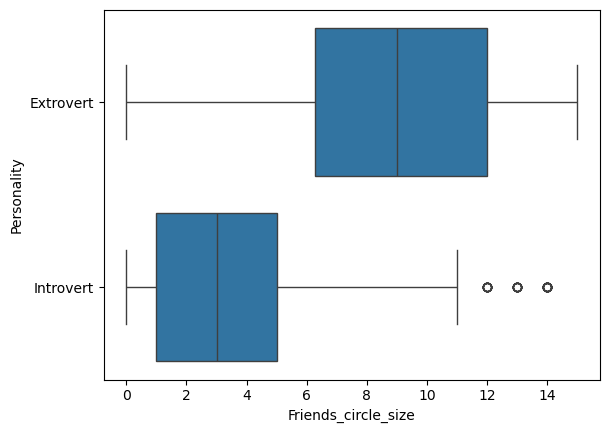

In [49]:
for i in numerical_columns:
    sns.boxplot(data=df, x=i , y='Personality')
    plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Scores</p>

<Axes: xlabel='Personality'>

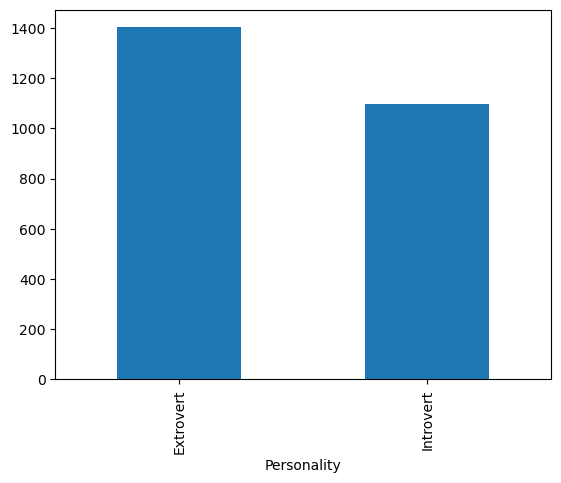

In [51]:
df['Personality'].value_counts().plot(kind='bar')

In [52]:
df['Personality'] = df['Personality'].map({
    'Extrovert': 0,
    'Introvert': 1,
})

In [53]:
# mi scores
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

def calculate_mi_scores(df, target_col):
    mi_scores = {}
    for col in df.columns:
        if col != target_col:
            if df[col].dtype == 'object':
                le = LabelEncoder()
                encoded_col = le.fit_transform(df[col])
                mi_score = mutual_info_regression(encoded_col.reshape(-1, 1), df[target_col])
            else:
                mi_score = mutual_info_regression(df[[col]], df[target_col])
            mi_scores[col] = mi_score[0]
    return pd.Series(mi_scores).sort_values(ascending=False)
mi_scores = calculate_mi_scores(df, 'Personality')

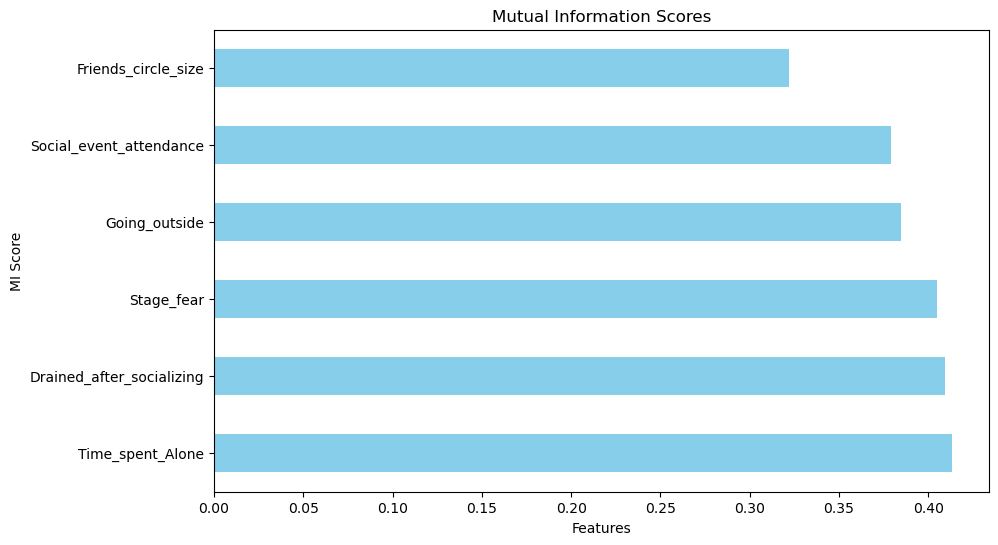

In [61]:
# miscores plot visualization
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='barh', color='skyblue')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('MI Score')
plt.show()